# ANÁLISIS EXPLORATORIO DE DATOS (EDA)
---
Este notebook realiza un análisis exhaustivo de los datos con visualizaciones y estadísticas descriptivas.

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de visualización
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_palette('husl')

# Configuración para mostrar todos los decimales
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [2]:
# ===== Lectura de Data
file_path = os.path.join('.','..','Data','raw','german.data')
with open(file_path,'r') as file:
    lines = [line.replace('\n','').split(' ') for line in file]

# ===== Creacion de DataFrame
dataframe = pd.DataFrame(
    data = lines,
    columns = [
        'status_checking_account', # 1.  cualitative
        'month_credit_duration',   # 2.  numeric
        'credit_history',          # 3.  cualitative
        'purpose',                 # 4.  cualitative
        'credit_amount',           # 5.  numeric
        'savings_type',            # 6.  cualitative
        'years_of_employment',     # 7.  cualitative
        'pct_fee_income',          # 8.  numeric
        'status_sex',              # 9.  cualitative
        'debtors',                 # 10. cualitative
        'years_of_residence',      # 11. numeric
        'property',                # 12. cualitative
        'age',                     # 13. numeric
        'other_installments',      # 14. cualitative
        'housing',                 # 15. cualitative
        'num_existing_credits',    # 16. numeric
        'job',                     # 17. cualitative
        'num_dependents',          # 18. numeric
        'telephone',               # 19. cualitative
        'foreign_worker',          # 20. cualitative
        'target'                   # 21. (1 = Good, 2 = Bad)
    ]
)

print(f"Dataset cargado: {dataframe.shape[0]} filas x {dataframe.shape[1]} columnas")

Dataset cargado: 1000 filas x 21 columnas


## 1. INFORMACIÓN GENERAL DEL DATASET

In [3]:
print("="*70)
print("1. INFORMACIÓN GENERAL DEL DATASET")
print("="*70)

print(f"\n📊 Dimensiones totales: {dataframe.shape[0]} filas x {dataframe.shape[1]} columnas\n")
print("📋 Tipos de datos por columna:")
print("-" * 70)

for col in dataframe.columns:
    print(f"  • '{col}': {dataframe[col].dtype} ({dataframe[col].nunique()} valores únicos)")

print("\n📑 Vista previa del dataset:")
display(dataframe.head())

print("\n🔍 Información detallada:")
dataframe.info()

1. INFORMACIÓN GENERAL DEL DATASET

📊 Dimensiones totales: 1000 filas x 21 columnas

📋 Tipos de datos por columna:
----------------------------------------------------------------------
  • 'status_checking_account': object (4 valores únicos)
  • 'month_credit_duration': object (33 valores únicos)
  • 'credit_history': object (5 valores únicos)
  • 'purpose': object (10 valores únicos)
  • 'credit_amount': object (921 valores únicos)
  • 'savings_type': object (5 valores únicos)
  • 'years_of_employment': object (5 valores únicos)
  • 'pct_fee_income': object (4 valores únicos)
  • 'status_sex': object (4 valores únicos)
  • 'debtors': object (3 valores únicos)
  • 'years_of_residence': object (4 valores únicos)
  • 'property': object (4 valores únicos)
  • 'age': object (53 valores únicos)
  • 'other_installments': object (3 valores únicos)
  • 'housing': object (3 valores únicos)
  • 'num_existing_credits': object (4 valores únicos)
  • 'job': object (4 valores únicos)
  • 'num_depen

,status_checking_account,month_credit_duration,credit_history,purpose,credit_amount,savings_type,years_of_employment,pct_fee_income,status_sex,debtors,...,property,age,other_installments,housing,num_existing_credits,job,num_dependents,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2



🔍 Información detallada:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status_checking_account  1000 non-null   object
 1   month_credit_duration    1000 non-null   object
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   object
 5   savings_type             1000 non-null   object
 6   years_of_employment      1000 non-null   object
 7   pct_fee_income           1000 non-null   object
 8   status_sex               1000 non-null   object
 9   debtors                  1000 non-null   object
 10  years_of_residence       1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   object
 13  other_installments       1000 non-null   object
 14  housing        

## 2. ESTADÍSTICAS DESCRIPTIVAS BÁSICAS
### 2.1 Variables Numéricas

In [4]:
print("="*70)
print("2.1 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*70)

numeric_cols = ['month_credit_duration','credit_amount','pct_fee_income','years_of_residence','age','num_existing_credits','num_dependents']
for col in numeric_cols:
    dataframe[col] = dataframe[col].astype(int)

if numeric_cols:
    print(f"\n✓ Se encontraron {len(numeric_cols)} variables numéricas\n")
    
    stats = dataframe[numeric_cols].describe().T
    
    for col in numeric_cols:
        print(f"\n📈 Variable: '{col}'")
        print("-" * 50)
        print(f"  • Media: {stats.loc[col, 'mean']:.2f}")
        print(f"  • Mediana: {dataframe[col].median():.2f}")
        print(f"  • Desviación estándar: {stats.loc[col, 'std']:.2f}")
        print(f"  • Mínimo: {stats.loc[col, 'min']:.2f}")
        print(f"  • Percentil 25%: {stats.loc[col, '25%']:.2f}")
        print(f"  • Percentil 50% (mediana): {stats.loc[col, '50%']:.2f}")
        print(f"  • Percentil 75%: {stats.loc[col, '75%']:.2f}")
        print(f"  • Máximo: {stats.loc[col, 'max']:.2f}")
    
    print("\n📊 Tabla de estadísticas descriptivas completa:")
    display(stats)
else:
    print("\n⚠️ No hay variables numéricas en el dataset.")

2.1 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS

✓ Se encontraron 7 variables numéricas


📈 Variable: 'month_credit_duration'
--------------------------------------------------
  • Media: 20.90
  • Mediana: 18.00
  • Desviación estándar: 12.06
  • Mínimo: 4.00
  • Percentil 25%: 12.00
  • Percentil 50% (mediana): 18.00
  • Percentil 75%: 24.00
  • Máximo: 72.00

📈 Variable: 'credit_amount'
--------------------------------------------------
  • Media: 3271.26
  • Mediana: 2319.50
  • Desviación estándar: 2822.74
  • Mínimo: 250.00
  • Percentil 25%: 1365.50
  • Percentil 50% (mediana): 2319.50
  • Percentil 75%: 3972.25
  • Máximo: 18424.00

📈 Variable: 'pct_fee_income'
--------------------------------------------------
  • Media: 2.97
  • Mediana: 3.00
  • Desviación estándar: 1.12
  • Mínimo: 1.00
  • Percentil 25%: 2.00
  • Percentil 50% (mediana): 3.00
  • Percentil 75%: 4.00
  • Máximo: 4.00

📈 Variable: 'years_of_residence'
--------------------------------------------------
  

,count,mean,std,min,25%,50%,75%,max
month_credit_duration,1000.00,20.90,12.06,4.00,12.00,18.00,24.00,72.00
credit_amount,1000.00,3271.26,2822.74,250.00,1365.50,2319.50,3972.25,18424.00
pct_fee_income,1000.00,2.97,1.12,1.00,2.00,3.00,4.00,4.00
years_of_residence,1000.00,2.85,1.10,1.00,2.00,3.00,4.00,4.00
age,1000.00,35.55,11.38,19.00,27.00,33.00,42.00,75.00
num_existing_credits,1000.00,1.41,0.58,1.00,1.00,1.00,2.00,4.00
num_dependents,1000.00,1.16,0.36,1.00,1.00,1.00,1.00,2.00


📊 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS


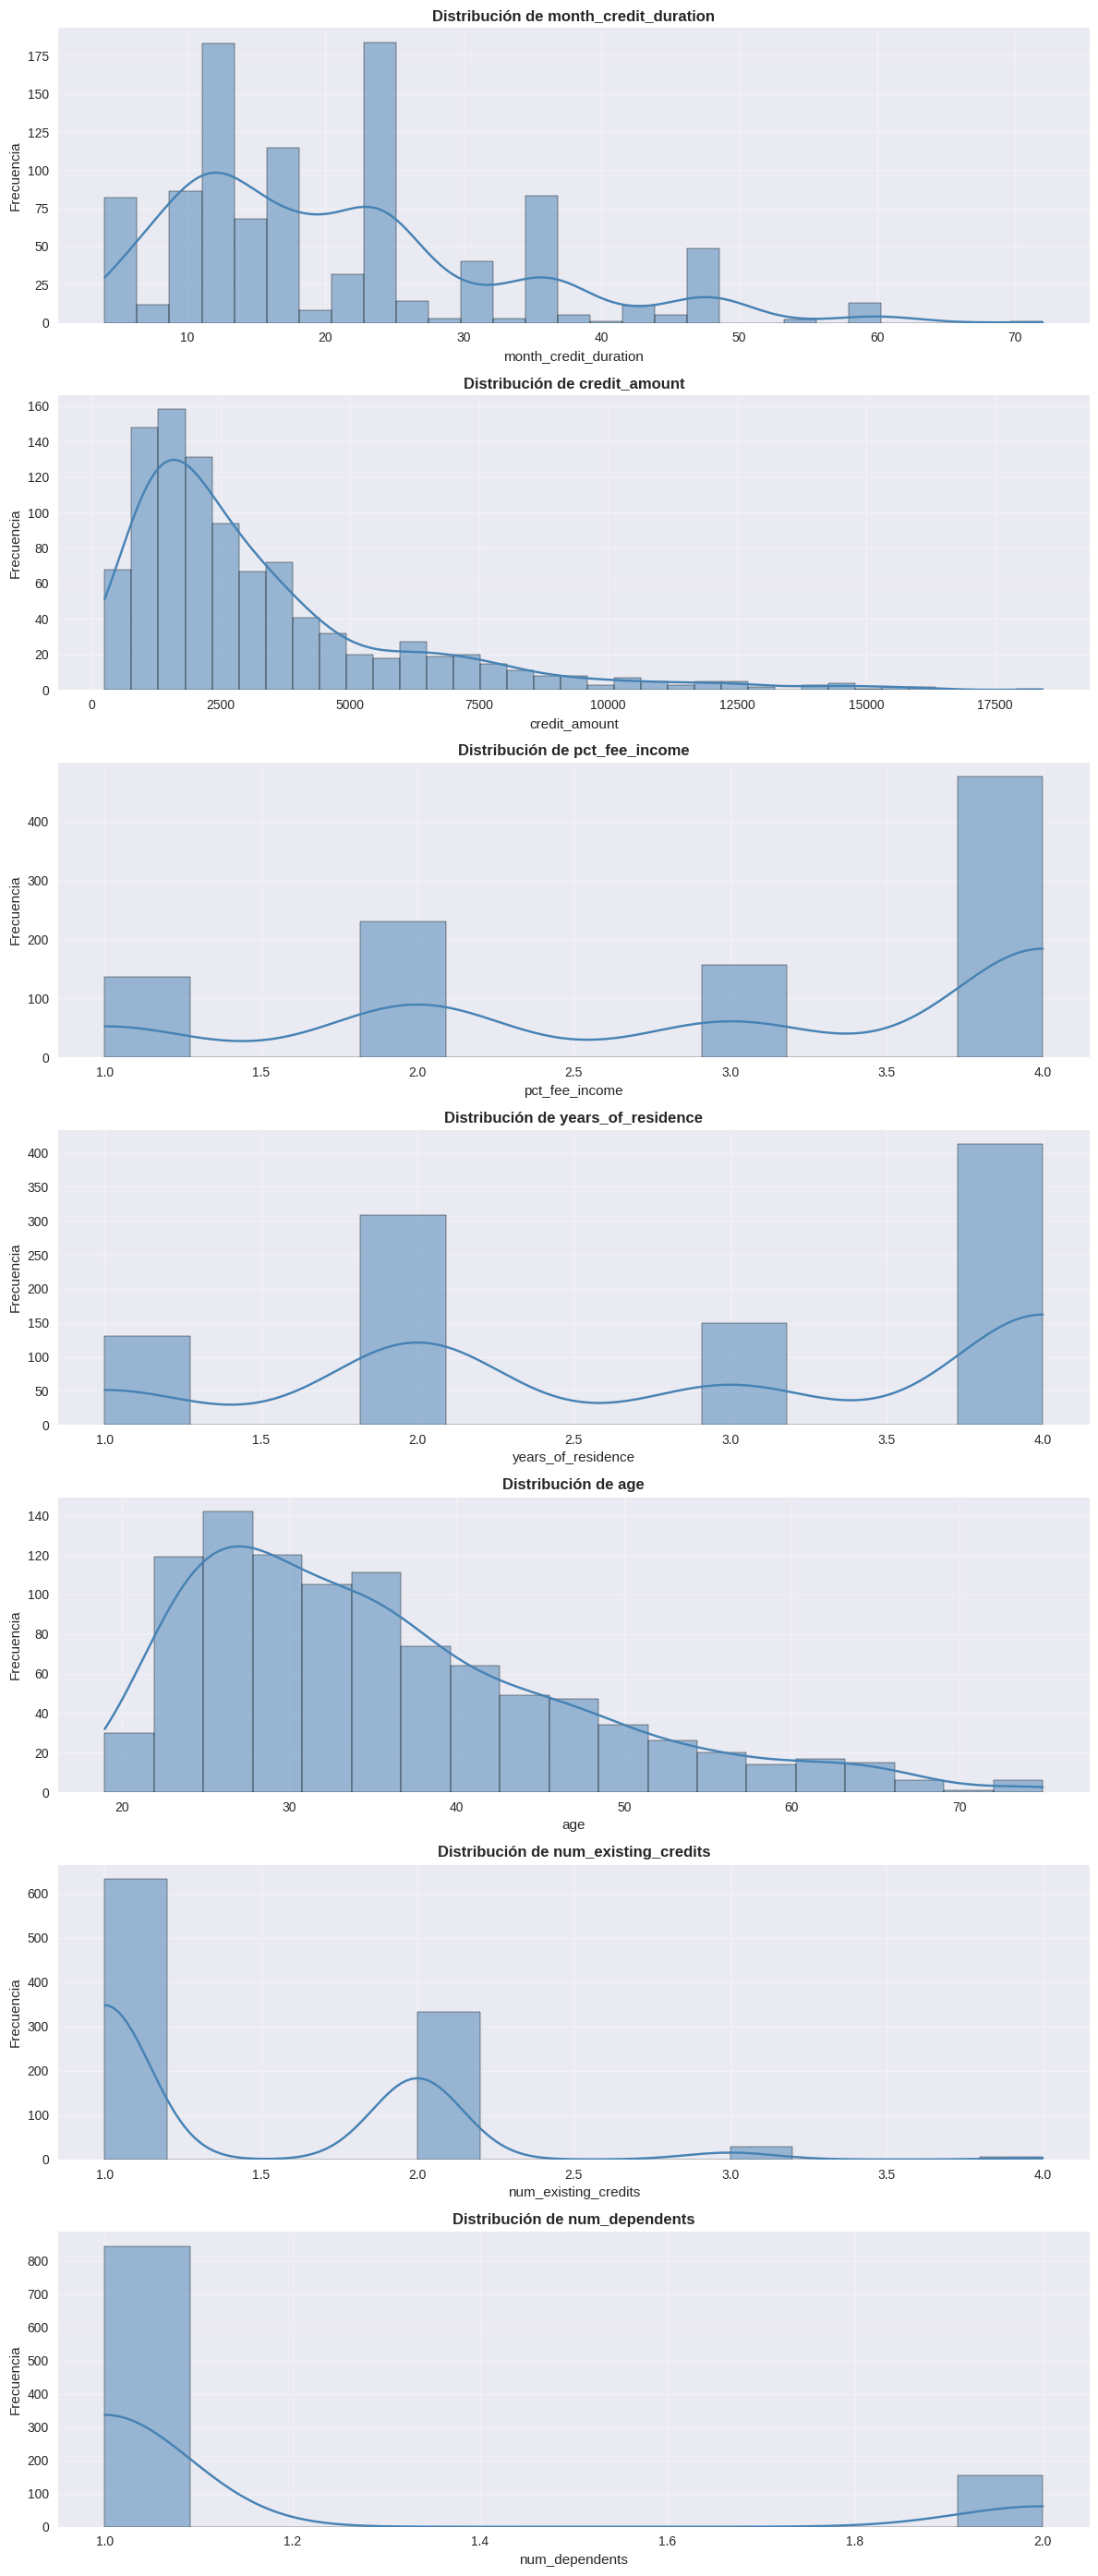


✓ Visualización completada


In [5]:
# Visualización: Distribución de variables numéricas
if numeric_cols:
    print("📊 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS")
    print("="*70)
    
    fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(12, 4*len(numeric_cols)))
    if len(numeric_cols) == 1:
        axes = [axes]
    
    for i, col in enumerate(numeric_cols):
        sns.histplot(dataframe[col], kde=True, ax=axes[i], color='steelblue')
        axes[i].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    # plt.savefig('eda_numeric_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Visualización completada")

### 2.2 Variables Categóricas

In [6]:
print("="*70)
print("2.2 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("="*70)

categorical_cols = dataframe.select_dtypes(exclude=[np.number]).columns.tolist()

if categorical_cols:
    print(f"\n✓ Se encontraron {len(categorical_cols)} variables categóricas\n")
    
    for col in categorical_cols:
        value_counts = dataframe[col].value_counts()
        percentages = dataframe[col].value_counts(normalize=True) * 100
        
        print(f"\n📋 Variable: '{col}'")
        print("-" * 50)
        print(f"  • Total de categorías únicas: {len(value_counts)}")
        print(f"\n  🏆 Top 5 categorías más frecuentes:")
        
        for i, (category, count) in enumerate(zip(value_counts.index[:5], value_counts.values[:5])):
            pct = percentages.loc[category]
            print(f"    {i+1}. '{category}': {count} registros ({pct:.2f}%)")
else:
    print("\n⚠️ No hay variables categóricas en el dataset.")

2.2 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS

✓ Se encontraron 14 variables categóricas


📋 Variable: 'status_checking_account'
--------------------------------------------------
  • Total de categorías únicas: 4

  🏆 Top 5 categorías más frecuentes:
    1. 'A14': 394 registros (39.40%)
    2. 'A11': 274 registros (27.40%)
    3. 'A12': 269 registros (26.90%)
    4. 'A13': 63 registros (6.30%)

📋 Variable: 'credit_history'
--------------------------------------------------
  • Total de categorías únicas: 5

  🏆 Top 5 categorías más frecuentes:
    1. 'A32': 530 registros (53.00%)
    2. 'A34': 293 registros (29.30%)
    3. 'A33': 88 registros (8.80%)
    4. 'A31': 49 registros (4.90%)
    5. 'A30': 40 registros (4.00%)

📋 Variable: 'purpose'
--------------------------------------------------
  • Total de categorías únicas: 10

  🏆 Top 5 categorías más frecuentes:
    1. 'A43': 280 registros (28.00%)
    2. 'A40': 234 registros (23.40%)
    3. 'A42': 181 registros (18.10%)
    

📊 DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS


/tmp/ipykernel_56798/902927545.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, ax=axes[i], palette='viridis')
/tmp/ipykernel_56798/902927545.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, ax=axes[i], palette='viridis')
/tmp/ipykernel_56798/902927545.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, ax=axes[i], palette='viridis')
/tmp/ipykernel_56798/902927545.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is dep

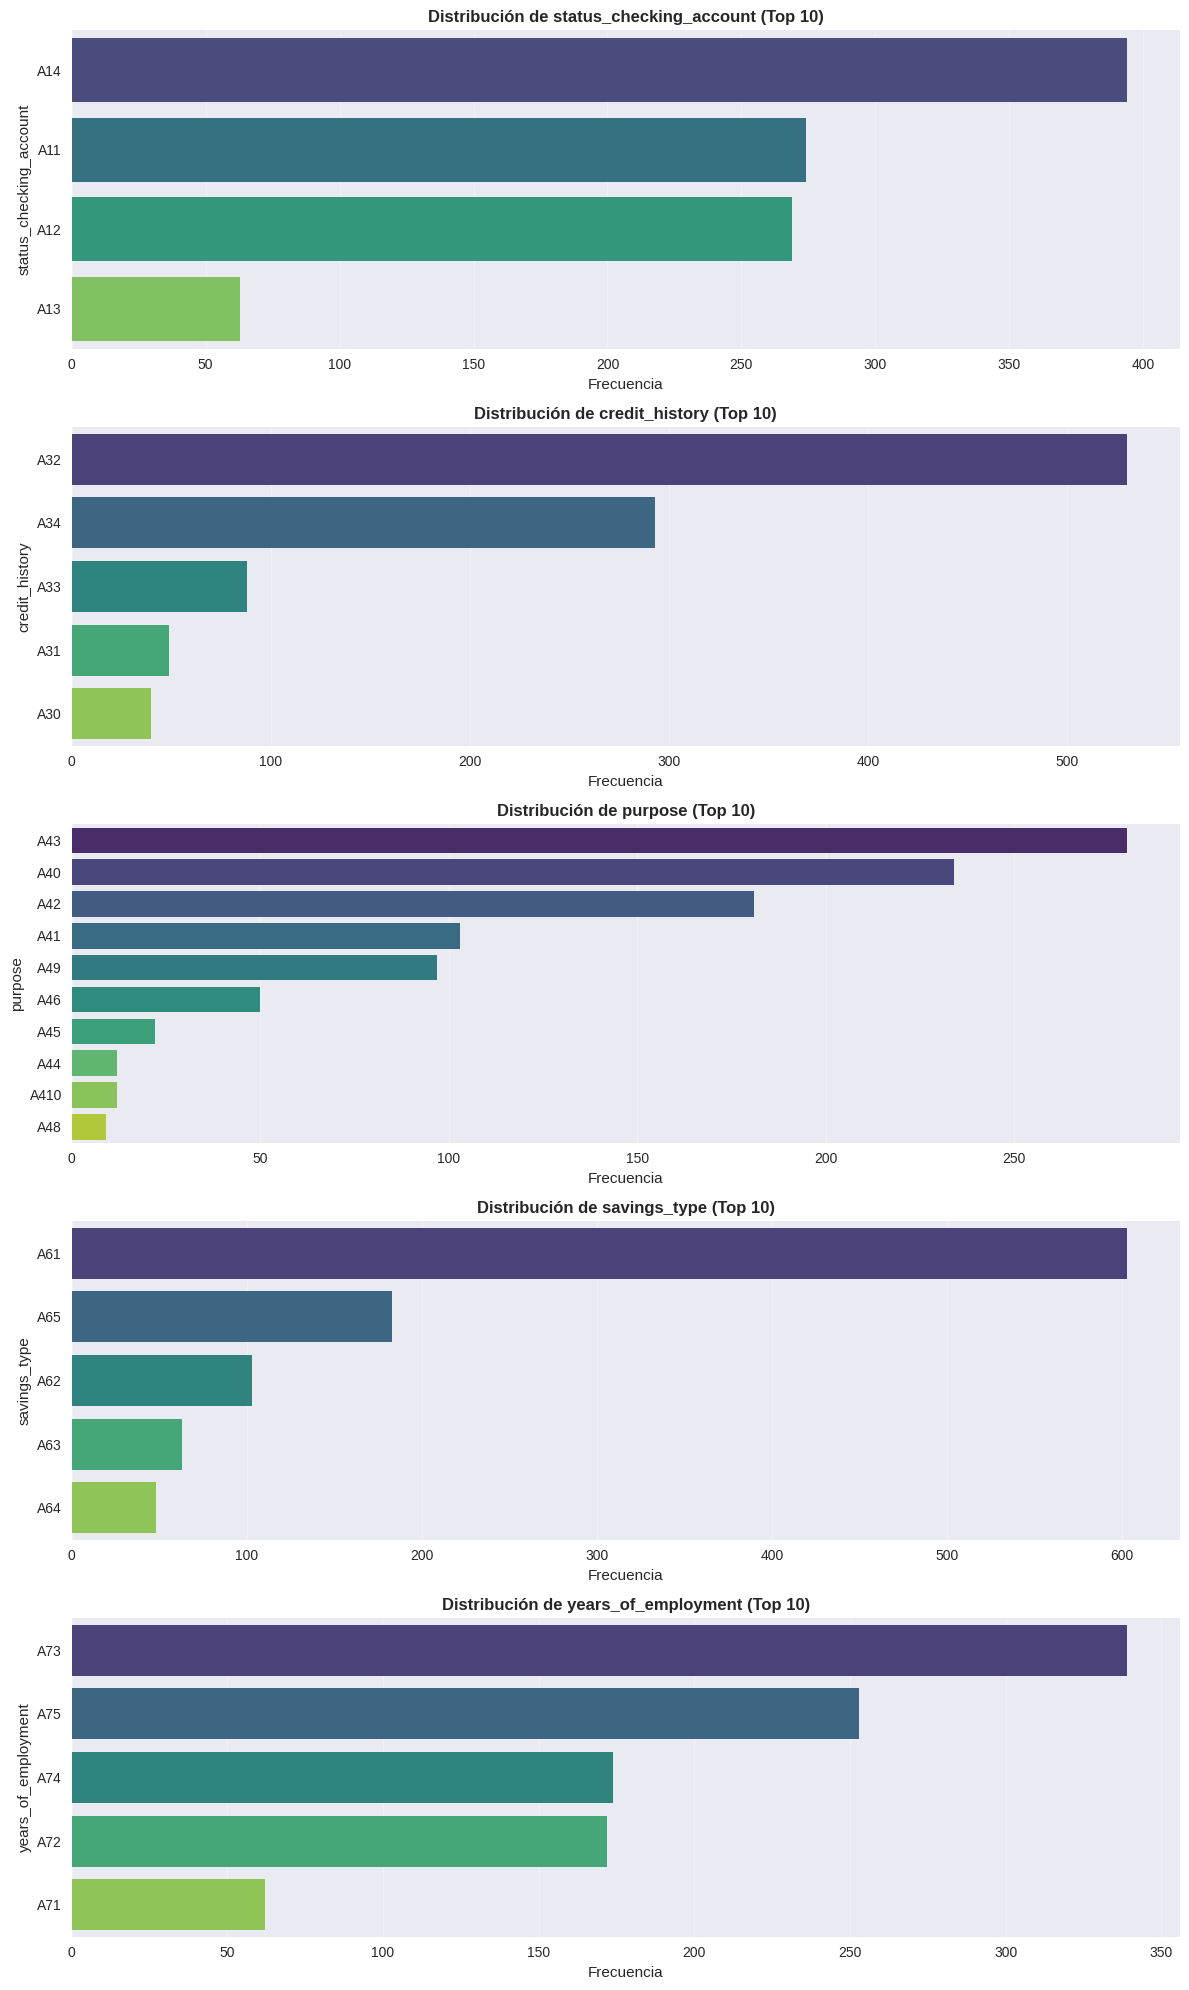


✓ Visualización completada
   (Se mostraron las primeras 5 de 14 variables categóricas)


In [7]:
# Visualización: Distribución de variables categóricas
if categorical_cols:
    print("📊 DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS")
    print("="*70)
    
    n_plots = min(5, len(categorical_cols))
    fig, axes = plt.subplots(n_plots, 1, figsize=(12, 4*n_plots))
    if n_plots == 1:
        axes = [axes]
    
    for i, col in enumerate(categorical_cols[:5]):
        value_counts = dataframe[col].value_counts()
        top_10 = value_counts.head(10)  # Mostrar solo top 10 para evitar saturación
        
        sns.barplot(x=top_10.values, y=top_10.index, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribución de {col} (Top 10)', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Frecuencia')
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    # plt.savefig('eda_categorical_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Visualización completada")
    if len(categorical_cols) > 5:
        print(f"   (Se mostraron las primeras 5 de {len(categorical_cols)} variables categóricas)")

## 3. ANÁLISIS DE VALORES FALTANTES

In [8]:
print("="*70)
print("3. ANÁLISIS DE VALORES FALTANTES")
print("="*70)

missing = dataframe.isnull().sum()
missing_percent = (missing / len(dataframe)) * 100
total_missing = missing.sum()

print(f"\n📊 Total de valores faltantes en el dataset: {total_missing}")
print(f"📊 Porcentaje total de valores faltantes: {(total_missing / (dataframe.shape[0] * dataframe.shape[1])) * 100:.2f}%\n")

print("📋 Valores faltantes por columna:")
print("-" * 70)

has_missing = False
missing_data = []

for col in dataframe.columns:
    if missing[col] > 0:
        has_missing = True
        missing_data.append({
            'Columna': col,
            'Valores Faltantes': missing[col],
            'Porcentaje': missing_percent[col]
        })
        print(f"  ⚠️ '{col}': {missing[col]} valores faltantes ({missing_percent[col]:.2f}%)")

if not has_missing:
    print("  ✅ No hay valores faltantes en ninguna columna.")
else:
    print("\n📊 Resumen de valores faltantes:")
    missing_df = pd.DataFrame(missing_data).sort_values('Porcentaje', ascending=False)
    display(missing_df)

3. ANÁLISIS DE VALORES FALTANTES

📊 Total de valores faltantes en el dataset: 0
📊 Porcentaje total de valores faltantes: 0.00%

📋 Valores faltantes por columna:
----------------------------------------------------------------------
  ✅ No hay valores faltantes en ninguna columna.


In [9]:
# Visualización: Mapa de calor de valores faltantes
if total_missing > 0:
    print("📊 MAPA DE CALOR DE VALORES FALTANTES")
    print("="*70)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(dataframe.isnull(), cbar=True, yticklabels=False, 
                cmap='YlOrRd', cbar_kws={'label': 'Valores Faltantes'})
    plt.title('Mapa de Calor de Valores Faltantes', fontsize=14, fontweight='bold')
    plt.xlabel('Columnas')
    plt.tight_layout()
    # plt.savefig('eda_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Visualización completada")
else:
    print("✅ No hay valores faltantes para visualizar")

✅ No hay valores faltantes para visualizar


## 4. ANÁLISIS DE REGISTROS DUPLICADOS

In [10]:
print("="*70)
print("4. ANÁLISIS DE REGISTROS DUPLICADOS")
print("="*70)

duplicates = dataframe.duplicated().sum()
duplicate_pct = (duplicates / len(dataframe)) * 100

print(f"\n📊 Número de filas duplicadas: {duplicates}")
print(f"📊 Porcentaje de filas duplicadas: {duplicate_pct:.2f}%")

if duplicates > 0:
    print(f"\n⚠️ Se encontraron {duplicates} registros duplicados que podrían requerir atención.")
    print("\n📋 Ejemplos de registros duplicados (primeras 5 filas):")
    display(dataframe[dataframe.duplicated(keep=False)].head())
else:
    print("\n✅ No se encontraron registros duplicados en el dataset.")

4. ANÁLISIS DE REGISTROS DUPLICADOS

📊 Número de filas duplicadas: 0
📊 Porcentaje de filas duplicadas: 0.00%

✅ No se encontraron registros duplicados en el dataset.


## 5. ANÁLISIS DE LA VARIABLE OBJETIVO

In [11]:
print("="*70)
print("5. ANÁLISIS DE LA VARIABLE OBJETIVO ('target')")
print("="*70)

target_col = 'target'

if target_col in dataframe.columns:
    target_counts = dataframe[target_col].value_counts()
    target_percentages = dataframe[target_col].value_counts(normalize=True) * 100
    
    print(f"\n📊 Valores únicos en '{target_col}': {sorted(dataframe[target_col].unique().tolist())}")
    print(f"\n📋 Distribución de clases:")
    print("-" * 50)
    
    for value, count in target_counts.items():
        pct = target_percentages[value]
        print(f"  • Clase '{value}': {count} registros ({pct:.2f}%)")
    
    if len(target_counts) > 1:
        ratio = max(target_counts) / min(target_counts)
        print(f"\n⚖️ Ratio de desbalance (clase mayoritaria/minoritaria): {ratio:.2f}:1")
        
        if ratio > 1.5:
            print("   ⚠️ El dataset presenta desbalance de clases. Considere técnicas de balanceo.")
        else:
            print("   ✅ El dataset está relativamente balanceado.")
else:
    print(f"\n⚠️ Advertencia: La columna '{target_col}' no existe en el dataset.")
    print("   Columnas disponibles:", dataframe.columns.tolist())

5. ANÁLISIS DE LA VARIABLE OBJETIVO ('target')

📊 Valores únicos en 'target': ['1', '2']

📋 Distribución de clases:
--------------------------------------------------
  • Clase '1': 700 registros (70.00%)
  • Clase '2': 300 registros (30.00%)

⚖️ Ratio de desbalance (clase mayoritaria/minoritaria): 2.33:1
   ⚠️ El dataset presenta desbalance de clases. Considere técnicas de balanceo.


📊 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO


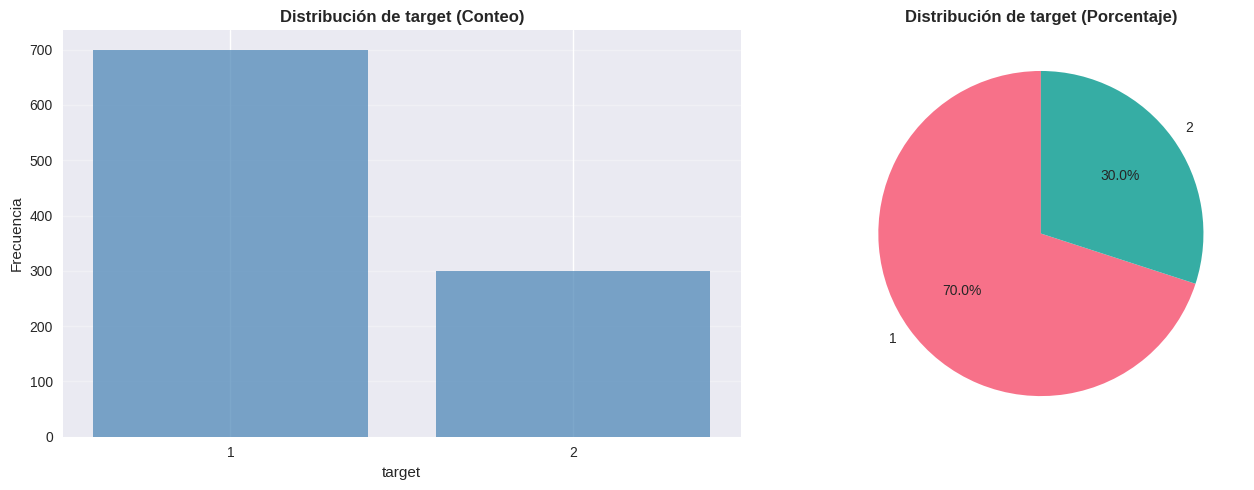


✓ Visualización completada


In [12]:
# Visualización: Distribución de la variable objetivo
if target_col in dataframe.columns:
    print("📊 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO")
    print("="*70)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Gráfico de barras
    target_counts = dataframe[target_col].value_counts()
    axes[0].bar(target_counts.index.astype(str), target_counts.values, color='steelblue', alpha=0.7)
    axes[0].set_title(f'Distribución de {target_col} (Conteo)', fontsize=12, fontweight='bold')
    axes[0].set_xlabel(target_col)
    axes[0].set_ylabel('Frecuencia')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Gráfico de pastel
    target_percentages = dataframe[target_col].value_counts(normalize=True) * 100
    axes[1].pie(target_percentages.values, labels=target_percentages.index, autopct='%1.1f%%',
                startangle=90, colors=sns.color_palette('husl', len(target_percentages)))
    axes[1].set_title(f'Distribución de {target_col} (Porcentaje)', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    # plt.savefig('eda_target_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Visualización completada")

## 6. ANÁLISIS DE CORRELACIONES

In [13]:
print("="*70)
print("6. ANÁLISIS DE CORRELACIONES ENTRE VARIABLES NUMÉRICAS")
print("="*70)

if len(numeric_cols) > 1:
    corr = dataframe[numeric_cols].corr()
    
    print("\n📊 Correlaciones significativas (|correlación| > 0.5):")
    print("-" * 70)
    
    high_corr = []
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            col1, col2 = numeric_cols[i], numeric_cols[j]
            correlation = corr.loc[col1, col2]
            if abs(correlation) > 0.5:
                high_corr.append({
                    'Variable 1': col1,
                    'Variable 2': col2,
                    'Correlación': correlation
                })
                emoji = "🔴" if abs(correlation) > 0.8 else "🟡"
                print(f"  {emoji} '{col1}' ↔ '{col2}': {correlation:.3f}")
    
    if not high_corr:
        print("  ✅ No se encontraron correlaciones significativas (|r| > 0.5) entre variables numéricas.")
    else:
        print(f"\n📋 Resumen: Se encontraron {len(high_corr)} pares de variables con correlación significativa.")
        corr_df = pd.DataFrame(high_corr).sort_values('Correlación', key=abs, ascending=False)
        display(corr_df)
else:
    print("\n⚠️ No hay suficientes variables numéricas (mínimo 2) para calcular correlaciones.")

6. ANÁLISIS DE CORRELACIONES ENTRE VARIABLES NUMÉRICAS

📊 Correlaciones significativas (|correlación| > 0.5):
----------------------------------------------------------------------
  🟡 'month_credit_duration' ↔ 'credit_amount': 0.625

📋 Resumen: Se encontraron 1 pares de variables con correlación significativa.


,Variable 1,Variable 2,Correlación
0,month_credit_duration,credit_amount,0.62


📊 MATRIZ DE CORRELACIÓN


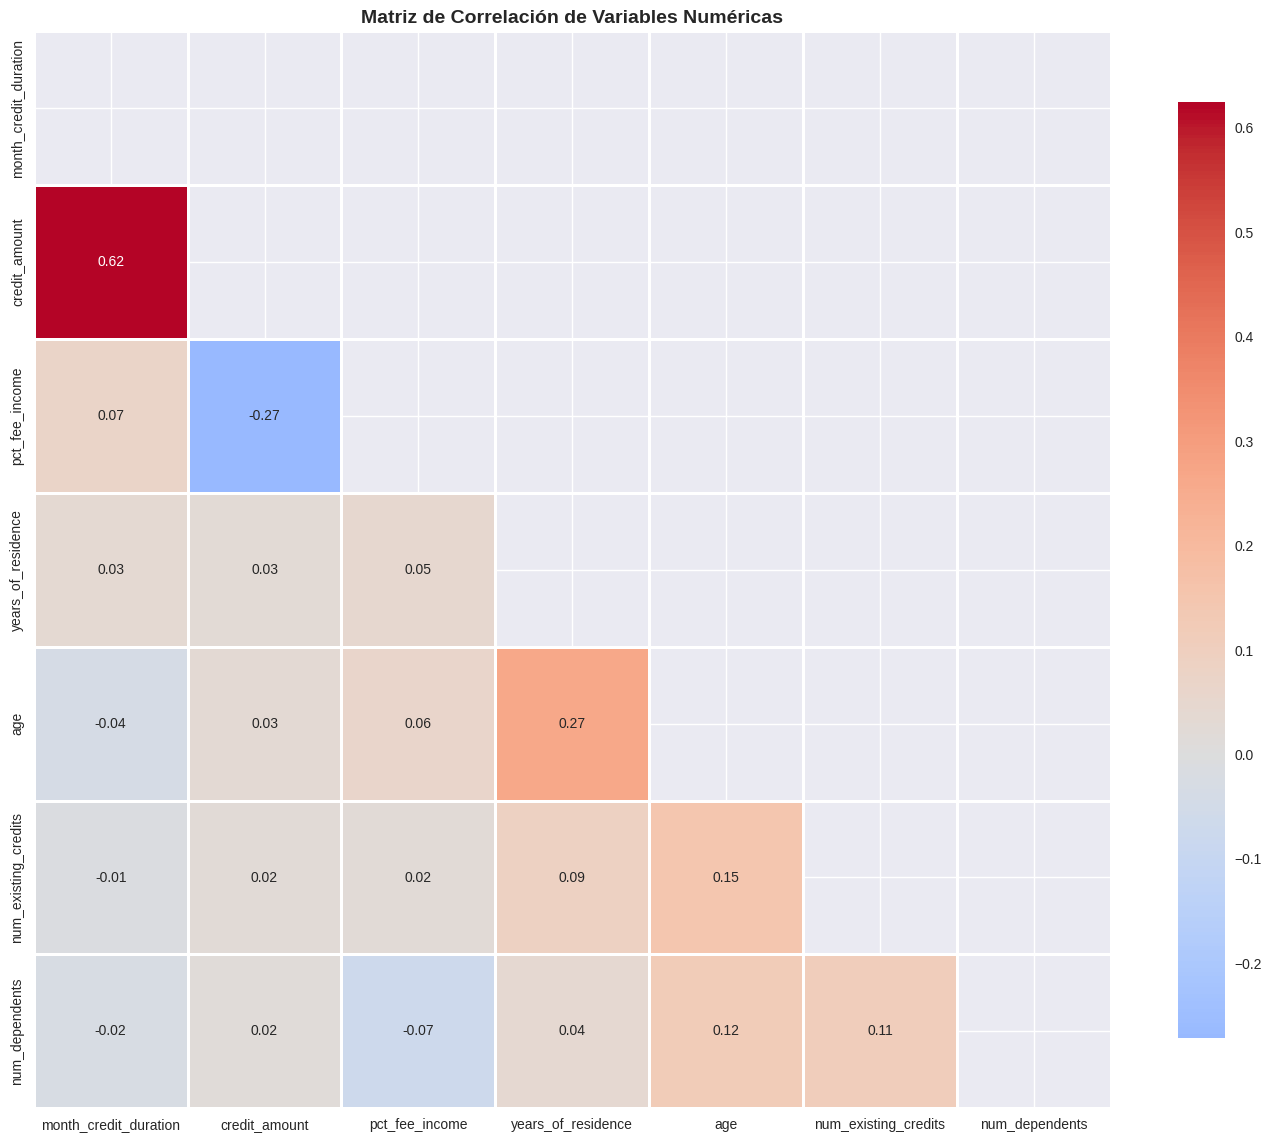


✓ Visualización completada
   Interpretación: Valores cercanos a +1 indican correlación positiva fuerte
                   Valores cercanos a -1 indican correlación negativa fuerte
                   Valores cercanos a 0 indican poca o ninguna correlación


In [14]:
# Visualización: Matriz de correlación
if len(numeric_cols) > 1:
    print("📊 MATRIZ DE CORRELACIÓN")
    print("="*70)
    
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr, dtype=bool))  # Máscara para triángulo superior
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
                mask=mask, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14, fontweight='bold')
    plt.tight_layout()
    # plt.savefig('eda_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Visualización completada")
    print("   Interpretación: Valores cercanos a +1 indican correlación positiva fuerte")
    print("                   Valores cercanos a -1 indican correlación negativa fuerte")
    print("                   Valores cercanos a 0 indican poca o ninguna correlación")

## 7. DETECCIÓN DE OUTLIERS (MÉTODO IQR)

In [15]:
print("="*70)
print("7. DETECCIÓN DE OUTLIERS (MÉTODO IQR)")
print("="*70)
print("\n📊 Método: Rango Intercuartílico (IQR)")
print("   Outliers = valores < Q1 - 1.5*IQR o valores > Q3 + 1.5*IQR\n")

outliers_summary = []

for col in numeric_cols:
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
    outliers_count = len(outliers)
    outliers_pct = (outliers_count / len(dataframe)) * 100
    
    outliers_summary.append({
        'Variable': col,
        'Límite Inferior': lower_bound,
        'Límite Superior': upper_bound,
        'Outliers': outliers_count,
        'Porcentaje': outliers_pct
    })
    
    print(f"\n📈 Variable: '{col}'")
    print("-" * 50)
    print(f"  • Q1 (Percentil 25%): {Q1:.2f}")
    print(f"  • Q3 (Percentil 75%): {Q3:.2f}")
    print(f"  • IQR: {IQR:.2f}")
    print(f"  • Límite inferior: {lower_bound:.2f}")
    print(f"  • Límite superior: {upper_bound:.2f}")
    
    if outliers_count > 0:
        print(f"  ⚠️ Outliers detectados: {outliers_count} ({outliers_pct:.2f}%)")
        print(f"\n  📋 Ejemplos de outliers (máximo 5):")
        outlier_values = outliers[col].values[:5]
        for i, val in enumerate(outlier_values):
            print(f"      {i+1}. {val:.2f}")
    else:
        print(f"  ✅ No se detectaron outliers")

if outliers_summary:
    print("\n📊 RESUMEN DE OUTLIERS POR VARIABLE:")
    outliers_df = pd.DataFrame(outliers_summary).sort_values('Porcentaje', ascending=False)
    display(outliers_df)

7. DETECCIÓN DE OUTLIERS (MÉTODO IQR)

📊 Método: Rango Intercuartílico (IQR)
   Outliers = valores < Q1 - 1.5*IQR o valores > Q3 + 1.5*IQR


📈 Variable: 'month_credit_duration'
--------------------------------------------------
  • Q1 (Percentil 25%): 12.00
  • Q3 (Percentil 75%): 24.00
  • IQR: 12.00
  • Límite inferior: -6.00
  • Límite superior: 42.00
  ⚠️ Outliers detectados: 70 (7.00%)

  📋 Ejemplos de outliers (máximo 5):
      1. 48.00
      2. 48.00
      3. 60.00
      4. 45.00
      5. 48.00

📈 Variable: 'credit_amount'
--------------------------------------------------
  • Q1 (Percentil 25%): 1365.50
  • Q3 (Percentil 75%): 3972.25
  • IQR: 2606.75
  • Límite inferior: -2544.62
  • Límite superior: 7882.38
  ⚠️ Outliers detectados: 72 (7.20%)

  📋 Ejemplos de outliers (máximo 5):
      1. 9055.00
      2. 8072.00
      3. 12579.00
      4. 9566.00
      5. 14421.00

📈 Variable: 'pct_fee_income'
--------------------------------------------------
  • Q1 (Percentil 25%): 2.00
 

,Variable,Límite Inferior,Límite Superior,Outliers,Porcentaje
6,num_dependents,1.00,1.00,155,15.50
1,credit_amount,-2544.62,7882.38,72,7.20
0,month_credit_duration,-6.00,42.00,70,7.00
4,age,4.50,64.50,23,2.30
5,num_existing_credits,-0.50,3.50,6,0.60
2,pct_fee_income,-1.00,7.00,0,0.00
3,years_of_residence,-1.00,7.00,0,0.00


📊 DETECCIÓN VISUAL DE OUTLIERS (BOXPLOTS)


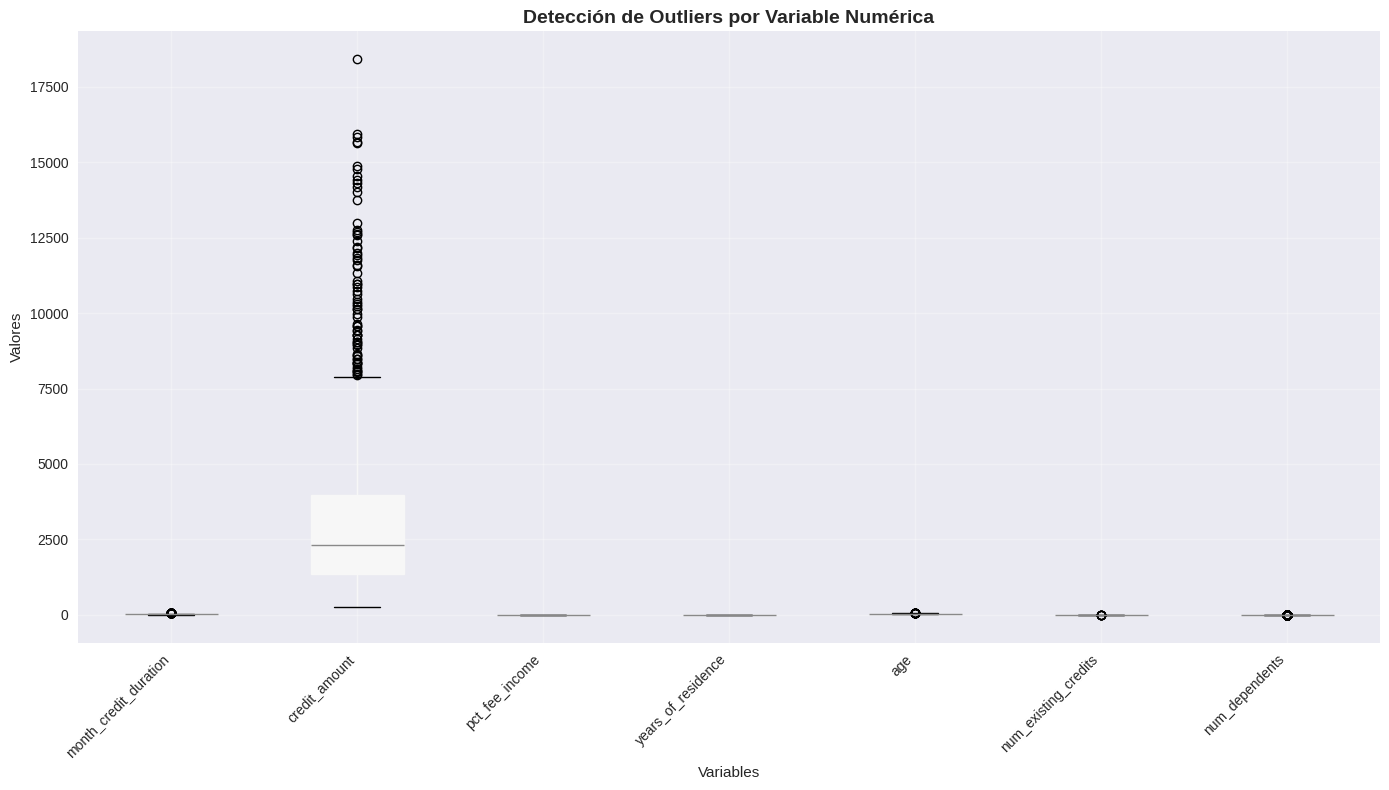


✓ Visualización completada
   Interpretación: Los puntos fuera de los "bigotes" son outliers potenciales


In [16]:
# Visualización: Boxplots para detección de outliers
if numeric_cols:
    print('📊 DETECCIÓN VISUAL DE OUTLIERS (BOXPLOTS)')
    print('='*70)
    
    plt.figure(figsize=(14, 8))
    
    # Boxplot para todas las variables numéricas
    dataframe[numeric_cols].boxplot(figsize=(14, 8), patch_artist=True)
    plt.title('Detección de Outliers por Variable Numérica', fontsize=14, fontweight='bold')
    plt.xlabel('Variables')
    plt.ylabel('Valores')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    # plt.savefig('eda_outliers_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print('\n✓ Visualización completada')
    print('   Interpretación: Los puntos fuera de los "bigotes" son outliers potenciales')

## 8. ANÁLISIS BIVARIADO: RELACIÓN ENTRE VARIABLES Y TARGET

In [17]:
print("="*70)
print("8. ANÁLISIS BIVARIADO: RELACIÓN ENTRE VARIABLES Y TARGET")
print("="*70)

if target_col in dataframe.columns:
    print("\n📊 8.1 VARIABLES NUMÉRICAS vs TARGET")
    print("-" * 70)
    
    numeric_target_relationships = []
    
    for col in numeric_cols:
        mean_by_target = dataframe.groupby(target_col)[col].mean()
        std_by_target = dataframe.groupby(target_col)[col].std()
        
        print(f"\n📈 Variable: '{col}'")
        print("   Estadísticas por clase:")
        
        for target_value in mean_by_target.index:
            mean_val = mean_by_target.loc[target_value]
            std_val = std_by_target.loc[target_value]
            print(f"     • Clase '{target_value}': media = {mean_val:.2f}, std = {std_val:.2f}")
        
        if len(mean_by_target) > 1:
            diff_pct = abs((mean_by_target.iloc[1] - mean_by_target.iloc[0]) / mean_by_target.iloc[0]) * 100
            print(f"     ⚖️ Diferencia porcentual entre clases: {diff_pct:.2f}%")
            
            numeric_target_relationships.append({
                'Variable': col,
                'Diferencia (%)': diff_pct
            })
            
            if diff_pct > 20:
                print(f"     🔴 Alta diferencia - Variable potencialmente relevante para predicción")
            elif diff_pct > 10:
                print(f"     🟡 Diferencia moderada - Variable con relevancia media")
            else:
                print(f"     🟢 Baja diferencia - Variable con poca relevancia")
    
    if numeric_target_relationships:
        print("\n📋 Ranking de variables numéricas por relevancia:")
        ranking_df = pd.DataFrame(numeric_target_relationships).sort_values('Diferencia (%)', ascending=False)
        display(ranking_df)
    
    # Variables categóricas vs target
    print("\n" + "="*70)
    print("📊 8.2 VARIABLES CATEGÓRICAS vs TARGET")
    print("-" * 70)
    
    cat_cols_to_analyze = [col for col in categorical_cols if col != target_col]
    
    if cat_cols_to_analyze:
        for col in cat_cols_to_analyze:
            cross_tab = pd.crosstab(dataframe[col], dataframe[target_col], normalize='index') * 100
            
            print(f"\n📋 Variable: '{col}'")
            print(f"   Distribución porcentual de {target_col} por categoría:")
            
            # Mostrar solo las primeras 3 categorías
            for category in cross_tab.index[:3]:
                print(f"\n     Categoría '{category}':")
                for target_value in cross_tab.columns:
                    pct = cross_tab.loc[category, target_value]
                    print(f"       • Clase '{target_value}': {pct:.2f}%")
            
            if len(cross_tab.index) > 3:
                print(f"\n     ... ({len(cross_tab.index)-3} categorías adicionales no mostradas)")
    else:
        print("   ⚠️ No hay variables categóricas (además del target) para analizar.")
        
else:
    print(f"\n⚠️ No se puede realizar análisis bivariado porque la columna '{target_col}' no existe en el dataset.")

8. ANÁLISIS BIVARIADO: RELACIÓN ENTRE VARIABLES Y TARGET

📊 8.1 VARIABLES NUMÉRICAS vs TARGET
----------------------------------------------------------------------

📈 Variable: 'month_credit_duration'
   Estadísticas por clase:
     • Clase '1': media = 19.21, std = 11.08
     • Clase '2': media = 24.86, std = 13.28
     ⚖️ Diferencia porcentual entre clases: 29.43%
     🔴 Alta diferencia - Variable potencialmente relevante para predicción

📈 Variable: 'credit_amount'
   Estadísticas por clase:
     • Clase '1': media = 2985.46, std = 2401.47
     • Clase '2': media = 3938.13, std = 3535.82
     ⚖️ Diferencia porcentual entre clases: 31.91%
     🔴 Alta diferencia - Variable potencialmente relevante para predicción

📈 Variable: 'pct_fee_income'
   Estadísticas por clase:
     • Clase '1': media = 2.92, std = 1.13
     • Clase '2': media = 3.10, std = 1.09
     ⚖️ Diferencia porcentual entre clases: 6.05%
     🟢 Baja diferencia - Variable con poca relevancia

📈 Variable: 'years_of_resid

,Variable,Diferencia (%)
1,credit_amount,31.91
0,month_credit_duration,29.43
4,age,6.24
2,pct_fee_income,6.05
5,num_existing_credits,4.05
3,years_of_residence,0.25
6,num_dependents,0.21



📊 8.2 VARIABLES CATEGÓRICAS vs TARGET
----------------------------------------------------------------------

📋 Variable: 'status_checking_account'
   Distribución porcentual de target por categoría:

     Categoría 'A11':
       • Clase '1': 50.73%
       • Clase '2': 49.27%

     Categoría 'A12':
       • Clase '1': 60.97%
       • Clase '2': 39.03%

     Categoría 'A13':
       • Clase '1': 77.78%
       • Clase '2': 22.22%

     ... (1 categorías adicionales no mostradas)

📋 Variable: 'credit_history'
   Distribución porcentual de target por categoría:

     Categoría 'A30':
       • Clase '1': 37.50%
       • Clase '2': 62.50%

     Categoría 'A31':
       • Clase '1': 42.86%
       • Clase '2': 57.14%

     Categoría 'A32':
       • Clase '1': 68.11%
       • Clase '2': 31.89%

     ... (2 categorías adicionales no mostradas)

📋 Variable: 'purpose'
   Distribución porcentual de target por categoría:

     Categoría 'A40':
       • Clase '1': 61.97%
       • Clase '2': 38.03%

  

📊 RELACIÓN VARIABLES NUMÉRICAS vs TARGET


/tmp/ipykernel_56798/1640275515.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=dataframe, ax=axes[i, 0], palette='Set2')
/tmp/ipykernel_56798/1640275515.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=dataframe, ax=axes[i, 1], palette='Set2')
/tmp/ipykernel_56798/1640275515.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=dataframe, ax=axes[i, 0], palette='Set2')
/tmp/ipykernel_56798/1640275515.py:19: FutureWarning: 

Passing `palette` without ass

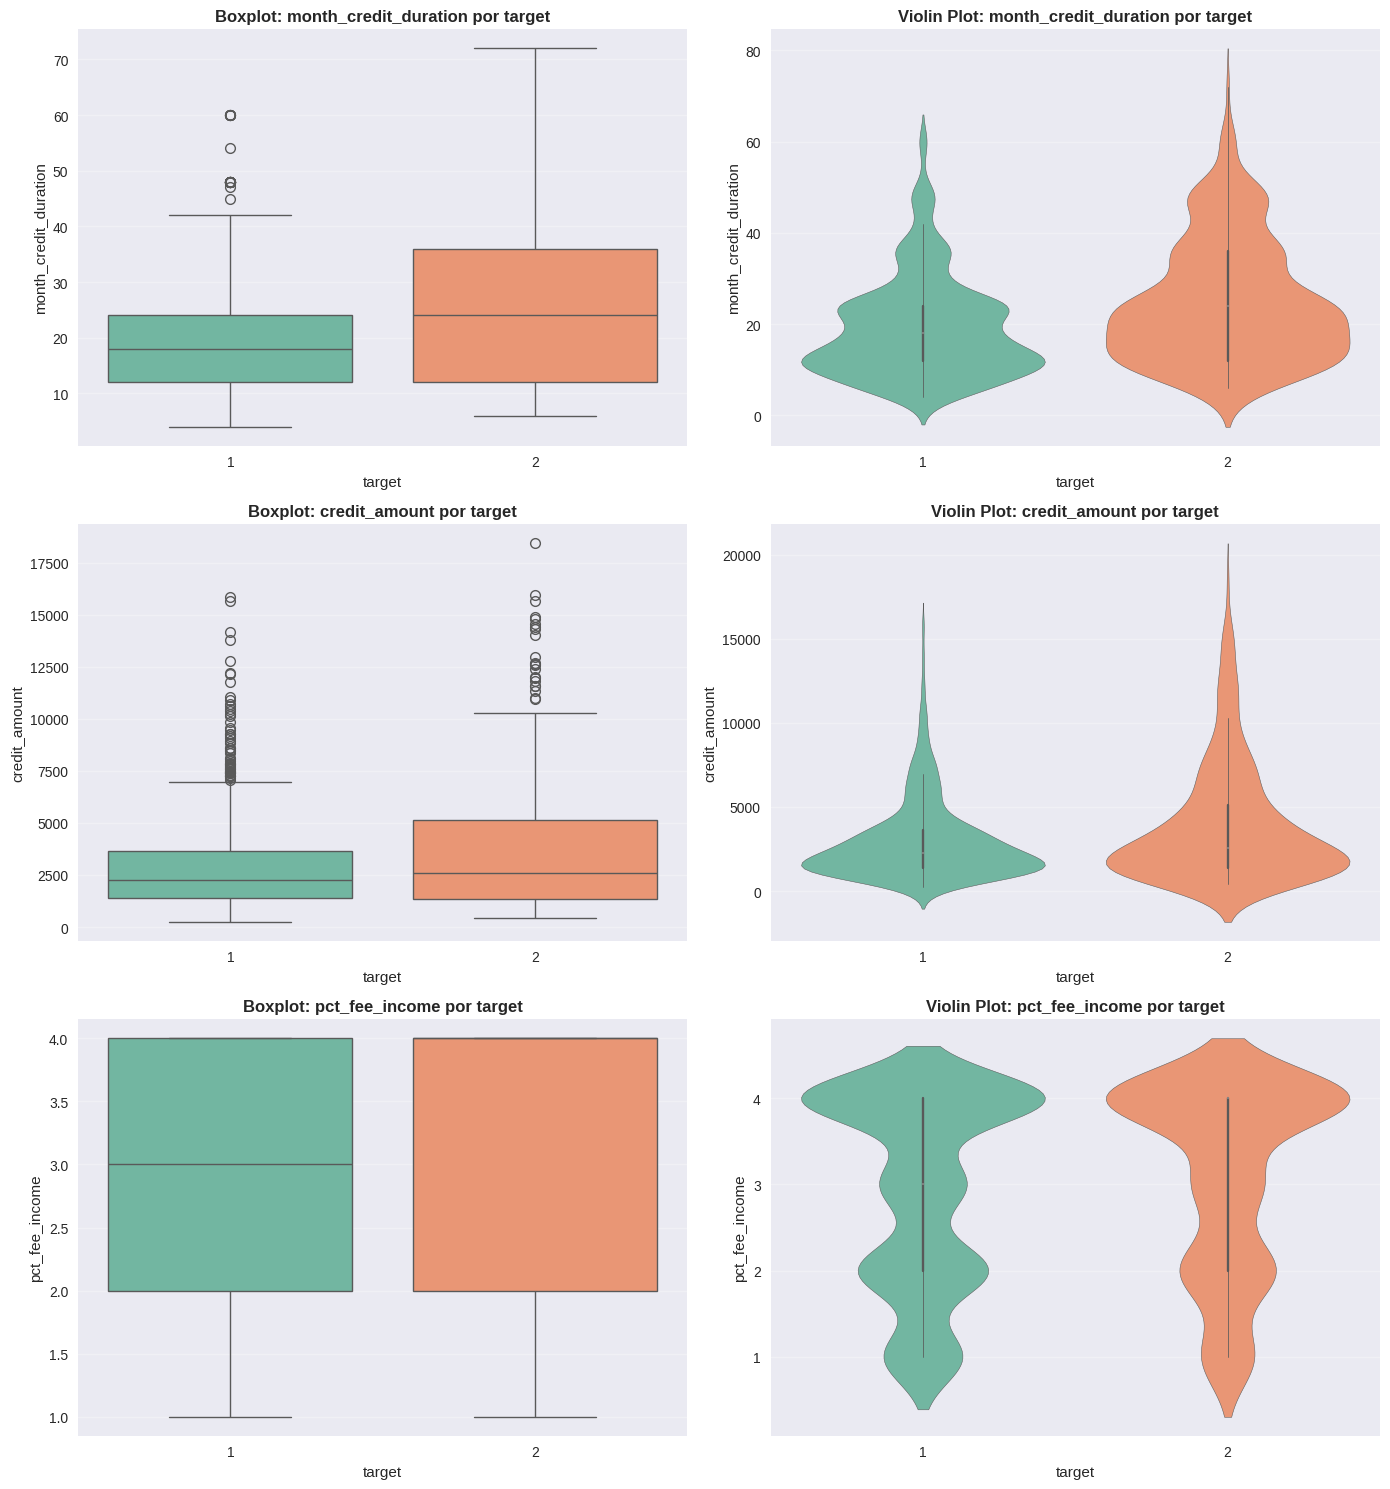


✓ Visualización completada
   (Se mostraron las primeras 3 de 7 variables numéricas)


In [18]:
# Visualización: Variables numéricas vs Target
if target_col in dataframe.columns and numeric_cols:
    print("📊 RELACIÓN VARIABLES NUMÉRICAS vs TARGET")
    print("="*70)
    
    n_plots = min(3, len(numeric_cols))
    fig, axes = plt.subplots(n_plots, 2, figsize=(14, 5*n_plots))
    
    if n_plots == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(numeric_cols[:3]):
        # Boxplot
        sns.boxplot(x=target_col, y=col, data=dataframe, ax=axes[i, 0], palette='Set2')
        axes[i, 0].set_title(f'Boxplot: {col} por {target_col}', fontweight='bold')
        axes[i, 0].grid(True, alpha=0.3, axis='y')
        
        # Violin plot
        sns.violinplot(x=target_col, y=col, data=dataframe, ax=axes[i, 1], palette='Set2')
        axes[i, 1].set_title(f'Violin Plot: {col} por {target_col}', fontweight='bold')
        axes[i, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    # plt.savefig('eda_bivariate_numeric.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Visualización completada")
    if len(numeric_cols) > 3:
        print(f"   (Se mostraron las primeras 3 de {len(numeric_cols)} variables numéricas)")

📊 RELACIÓN VARIABLES CATEGÓRICAS vs TARGET


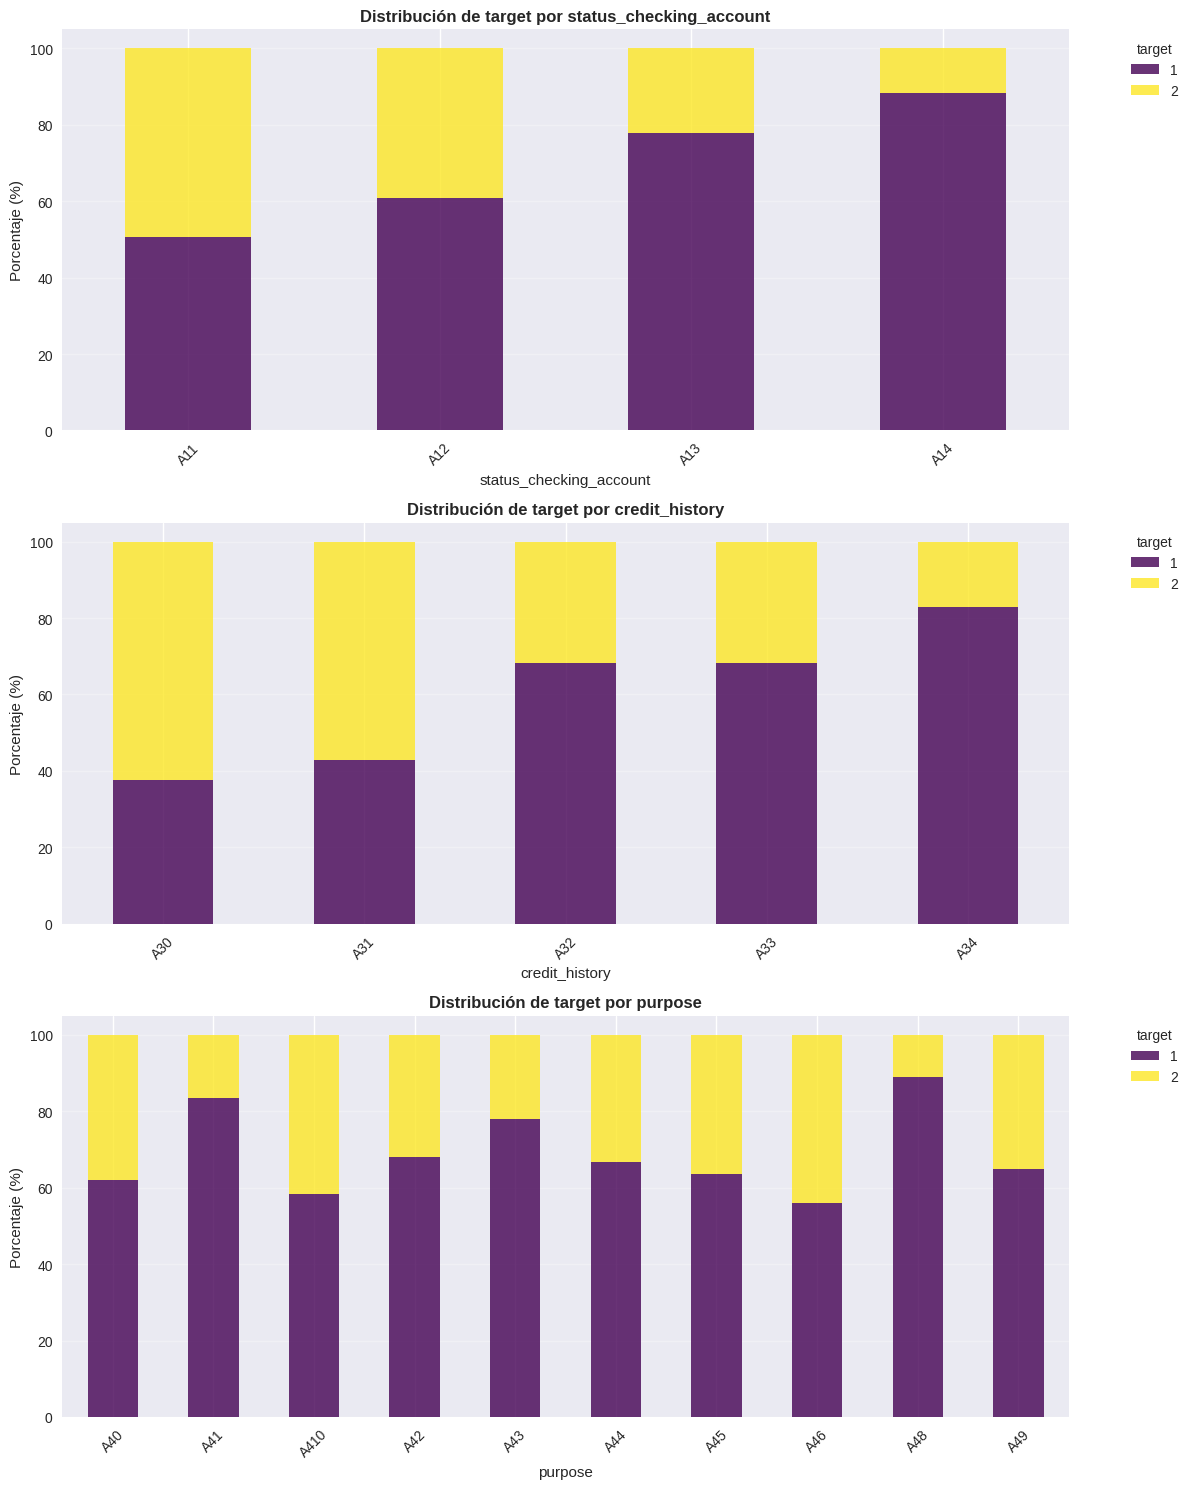


✓ Visualización completada


In [19]:
# Visualización: Variables categóricas vs Target
if target_col in dataframe.columns and categorical_cols:
    cat_cols_to_visualize = [col for col in categorical_cols[:3] if col != target_col]
    
    if cat_cols_to_visualize:
        print("📊 RELACIÓN VARIABLES CATEGÓRICAS vs TARGET")
        print("="*70)
        
        n_plots = len(cat_cols_to_visualize)
        fig, axes = plt.subplots(n_plots, 1, figsize=(12, 5*n_plots))
        
        if n_plots == 1:
            axes = [axes]
        
        for i, col in enumerate(cat_cols_to_visualize):
            # Gráfico de barras apiladas normalizado
            cross_tab = pd.crosstab(dataframe[col], dataframe[target_col], normalize='index') * 100
            
            # Limitar a top 10 categorías para evitar saturación
            if len(cross_tab) > 10:
                top_categories = dataframe[col].value_counts().head(10).index
                cross_tab = cross_tab.loc[top_categories]
            
            cross_tab.plot(kind='bar', stacked=True, ax=axes[i], 
                          colormap='viridis', alpha=0.8)
            axes[i].set_title(f'Distribución de {target_col} por {col}', 
                            fontsize=12, fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Porcentaje (%)')
            axes[i].legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        # plt.savefig('eda_bivariate_categorical.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n✓ Visualización completada")

## 9. RESUMEN EJECUTIVO Y CONCLUSIONES

In [20]:
print("="*70)
print("9. RESUMEN EJECUTIVO DEL ANÁLISIS")
print("="*70)

print("\n📊 CARACTERÍSTICAS DEL DATASET")
print("-" * 70)
print(f"  • Total de registros: {dataframe.shape[0]:,}")
print(f"  • Total de variables: {dataframe.shape[1]}")
print(f"    - Variables numéricas: {len(numeric_cols)}")
print(f"    - Variables categóricas: {len(categorical_cols)}")

print("\n📋 CALIDAD DE LOS DATOS")
print("-" * 70)
total_cells = dataframe.shape[0] * dataframe.shape[1]
missing_pct = (total_missing / total_cells) * 100
print(f"  • Valores faltantes: {total_missing:,} ({missing_pct:.2f}% del total)")
print(f"  • Registros duplicados: {duplicates} ({duplicate_pct:.2f}%)")
print(f"  • Completitud de los datos: {100 - missing_pct:.2f}%")

if target_col in dataframe.columns:
    print("\n🎯 VARIABLE OBJETIVO")
    print("-" * 70)
    target_counts = dataframe[target_col].value_counts()
    print(f"  • Clases: {len(target_counts)}")
    if len(target_counts) > 1:
        ratio = max(target_counts) / min(target_counts)
        print(f"  • Ratio de desbalance: {ratio:.2f}:1")
        if ratio > 2:
            print(f"  ⚠️ Dataset significativamente desbalanceado")
        else:
            print(f"  ✅ Dataset relativamente balanceado")

print("\n🔍 HALLAZGOS PRINCIPALES")
print("-" * 70)

# Outliers
total_outliers = sum([item['Outliers'] for item in outliers_summary])
if total_outliers > 0:
    print(f"  • Se detectaron {total_outliers:,} outliers en variables numéricas")
    most_outliers = max(outliers_summary, key=lambda x: x['Porcentaje'])
    print(f"    - Variable con más outliers: '{most_outliers['Variable']}' ({most_outliers['Porcentaje']:.2f}%)")

# Correlaciones
if len(numeric_cols) > 1 and high_corr:
    print(f"  • Se encontraron {len(high_corr)} pares de variables con correlación significativa (|r| > 0.5)")
    strongest = max(high_corr, key=lambda x: abs(x['Correlación']))
    print(f"    - Correlación más fuerte: '{strongest['Variable 1']}' ↔ '{strongest['Variable 2']}' (r={strongest['Correlación']:.3f})")

print("\n💡 RECOMENDACIONES")
print("-" * 70)

recommendations = []

if total_missing > 0:
    recommendations.append("Tratar valores faltantes (imputación o eliminación)")

if duplicates > 0:
    recommendations.append("Revisar y eliminar registros duplicados si corresponde")

if target_col in dataframe.columns and len(target_counts) > 1:
    ratio = max(target_counts) / min(target_counts)
    if ratio > 1.5:
        recommendations.append("Considerar técnicas de balanceo (SMOTE, undersampling, class weights)")

if total_outliers > len(dataframe) * 0.05:
    recommendations.append("Analizar outliers y decidir estrategia de tratamiento")

if len(numeric_cols) > 1 and high_corr:
    strong_corr = [c for c in high_corr if abs(c['Correlación']) > 0.8]
    if strong_corr:
        recommendations.append("Considerar eliminación de variables altamente correlacionadas")

recommendations.append("Aplicar normalización/estandarización a variables numéricas")
recommendations.append("Codificar variables categóricas (One-Hot, Label Encoding)")

for i, rec in enumerate(recommendations, 1):
    print(f"  {i}. {rec}")

print("\n" + "="*70)
print("✅ ANÁLISIS EXPLORATORIO DE DATOS COMPLETADO")
print("="*70)
print("\nTodas las visualizaciones han sido generadas.")
print("Puedes guardar las figuras descomentando las líneas plt.savefig() en cada celda.")

9. RESUMEN EJECUTIVO DEL ANÁLISIS

📊 CARACTERÍSTICAS DEL DATASET
----------------------------------------------------------------------
  • Total de registros: 1,000
  • Total de variables: 21
    - Variables numéricas: 7
    - Variables categóricas: 14

📋 CALIDAD DE LOS DATOS
----------------------------------------------------------------------
  • Valores faltantes: 0 (0.00% del total)
  • Registros duplicados: 0 (0.00%)
  • Completitud de los datos: 100.00%

🎯 VARIABLE OBJETIVO
----------------------------------------------------------------------
  • Clases: 2
  • Ratio de desbalance: 2.33:1
  ⚠️ Dataset significativamente desbalanceado

🔍 HALLAZGOS PRINCIPALES
----------------------------------------------------------------------
  • Se detectaron 326 outliers en variables numéricas
    - Variable con más outliers: 'num_dependents' (15.50%)
  • Se encontraron 1 pares de variables con correlación significativa (|r| > 0.5)
    - Correlación más fuerte: 'month_credit_duration' ↔ 'cr